In [48]:
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import precision_score, recall_score

In [9]:
from sklearn.datasets import fetch_openml
## conjuntos de dados abertos
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist

D:\Users\201911250022\AppData\Roaming\Python\Python310\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [15]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(-0.5, 27.5, 27.5, -0.5)

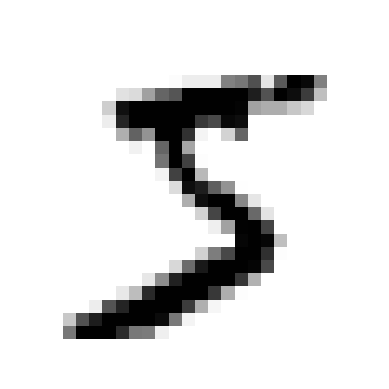

In [11]:
# Imagem
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

In [14]:
# Numero que representa aquela imagem
y[0]

'5'

Vamos treinar um modelo que verifique o número a partir da imagem.  
Usaremos o SGD (Gradiente Descendente Estocástico)

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
# Modelo pra apenas numeros 5
# nesse aqui temos um parametro chamado loss (funcao de perda). cada funcao de perda faz com que o classificador
# use outros classificadores por debaixo dos panos. isso faz com que o classificador fique mais simples, pois não precisamos
# setar muitos hyper parametros
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
# 5 é 5 (obviamente)
sgd_clf.predict([some_digit])

array([ True])

Vamos testar com outra imagem

(-0.5, 27.5, 27.5, -0.5)

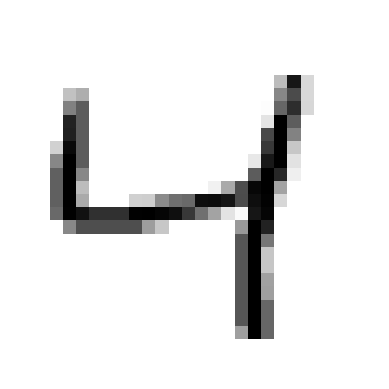

In [24]:
another_digit = X[2]
another_digit_image = another_digit.reshape(28, 28)
plt.imshow(another_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

In [25]:
sgd_clf.predict([another_digit])

array([False])

Agora, vamos medir a acurácia do nosso modelo com validação cruzada.  
Nesse caso, faremos a validação com 3 iterações (cada iteração pegamos um conjunto de teste e de validação aleatórios)

In [35]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Foi um valor bom! Mas a acurácia sozinha não diz muita coisa sobre o modelo.  
Esse modelo é treinado apenas com 5, logo ele vai funcionar bem apenas com cincos.

Vamos ver a matriz de confusão do nosso modelo para termos outra perspectiva do nosso modelo.

In [41]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
matrix = confusion_matrix(y_train_5, y_train_pred)

In [42]:
matrix

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

<Axes: >

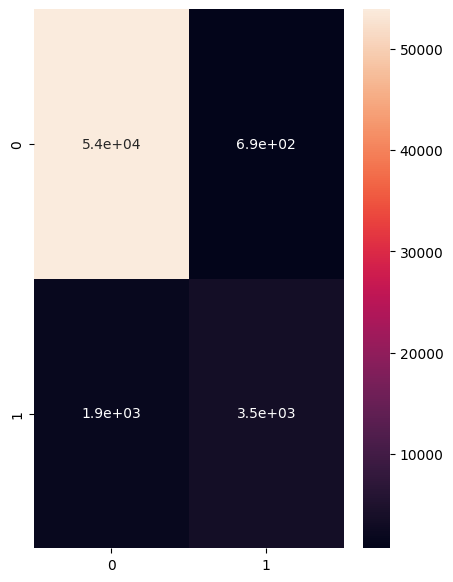

In [43]:
plt.figure(figsize=(5, 7))
sn.heatmap(matrix, annot=True)

As métricas **precisão** (não é o quão próximo minha aproximação está, mas sim a dispersão do modelo) e **recall** usam os valores da matriz de confusão pra calcular métricas que olham os nossos resultados de outro ângulo (não contando so quais o modelo acertou, mas também os que ele errou)

In [46]:
precision_score(y_train_5, y_train_pred)
## de todos SIM quantos realmente são SIM

0.8370879772350012

In [49]:
recall_score(y_train_5, y_train_pred)
## em cada predição, a minha sensibilidade daquele sim ser verdadeiro é de 65%

0.6511713705958311